In [19]:
%matplotlib inline
#import matplotlib
#matplotlib.use('tkAgg')
import numpy as np
import matplotlib.pyplot as plt
from opinions import OpinionModel
from neighbors import totally_connected
from neighbors import degree_connected #Working on name...

In [28]:
nsteps=500
nagents=25
neighbors = degree_connected(nagents, 1)
opinions = [[np.random.rand(), np.random.rand()] for i in range(nagents)]
model = OpinionModel(nagents, neighbors, opinions)

In [ ]:
model.ALPHA = .001
model.run(nsteps)

In [ ]:
agent_opinion = model.datacollector.get_agent_vars_dataframe()

In [ ]:
x=agent_opinion.Opinion0.as_matrix().reshape((nsteps, nagents))
plt.plot(x)

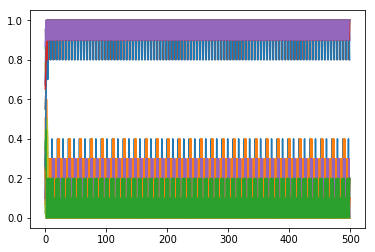

In [18]:
y=agent_opinion.Opinion1.as_matrix().reshape((nsteps, nagents))
plt.plot(y)